<a href="https://colab.research.google.com/github/jungwoo1208/AI_Study/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시그모이드 함수(sigmoid function)

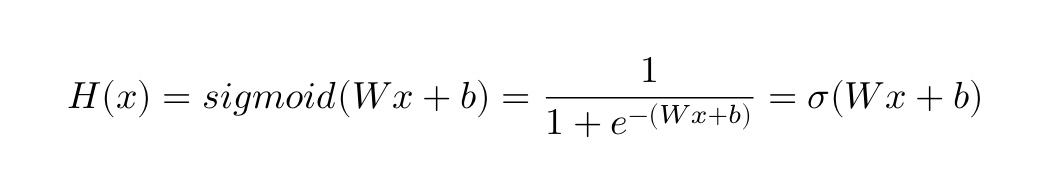

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

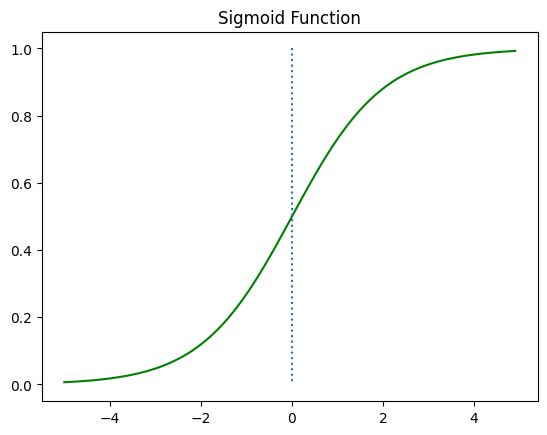

In [3]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

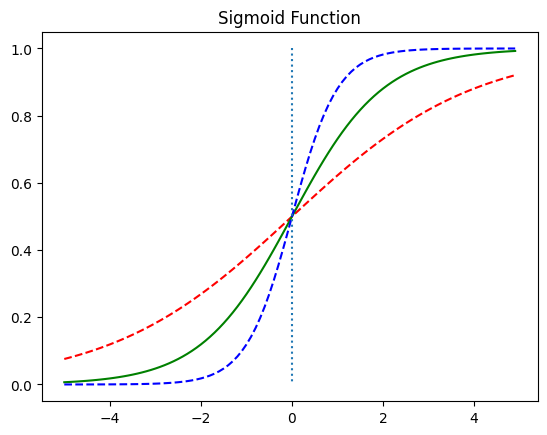

In [4]:
x= np.arange(-5, 5, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

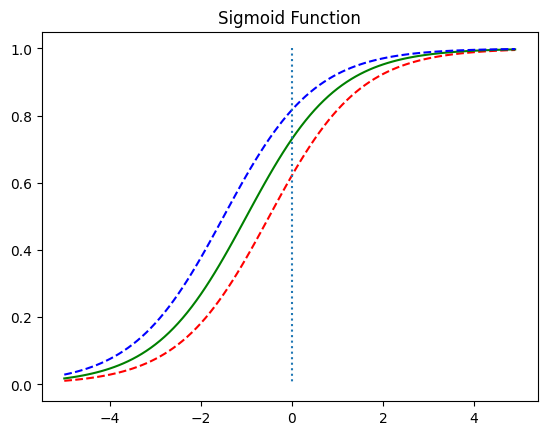

In [5]:
x= np.arange(-5, 5, 0.1)
y1 = sigmoid(0.5+x)
y2 = sigmoid(1+x)
y3 = sigmoid(1.5+x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

비용함수


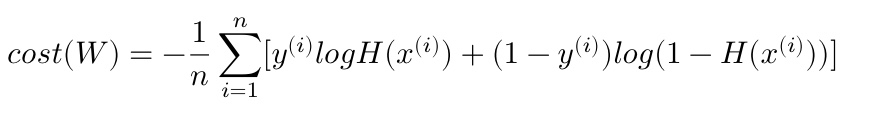

#로지스틱 회귀 구현

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
torch.manual_seed(1)

In [4]:
x_data = [[1, 2], [2,3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [5]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [6]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [8]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [9]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [10]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


비용함수


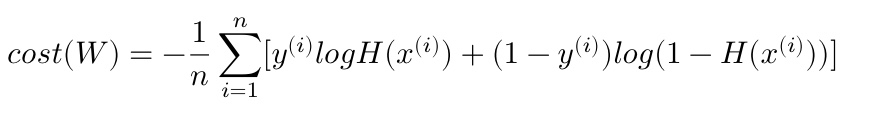

In [11]:
losses = -(y_train * torch.log(hypothesis) +
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [12]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


파이토치에는 로지스틱 비용함수 구현되어 있다.

In [13]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

#전체코드

In [14]:
x_data = [[1, 2], [2,3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

epochs = 1000
for epoch in range(epochs + 1):
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [15]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [16]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [17]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


#로지스틱 회귀 클래스로 구현

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
x_data = [[1, 2], [2,3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [8]:
class BinaryClassfier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))
model = BinaryClassfier()

In [12]:
optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 1000
for epoch in range(epochs + 1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, epochs, cost.item(), accuracy*100))

Epoch    0/1000 Cost: 2.278761 Accuracy 50.00%
Epoch   10/1000 Cost: 0.558071 Accuracy 50.00%
Epoch   20/1000 Cost: 0.464589 Accuracy 66.67%
Epoch   30/1000 Cost: 0.393819 Accuracy 83.33%
Epoch   40/1000 Cost: 0.334263 Accuracy 83.33%
Epoch   50/1000 Cost: 0.282190 Accuracy 83.33%
Epoch   60/1000 Cost: 0.235045 Accuracy 100.00%
Epoch   70/1000 Cost: 0.193614 Accuracy 100.00%
Epoch   80/1000 Cost: 0.163800 Accuracy 100.00%
Epoch   90/1000 Cost: 0.147815 Accuracy 100.00%
Epoch  100/1000 Cost: 0.137354 Accuracy 100.00%
Epoch  110/1000 Cost: 0.128460 Accuracy 100.00%
Epoch  120/1000 Cost: 0.120669 Accuracy 100.00%
Epoch  130/1000 Cost: 0.113786 Accuracy 100.00%
Epoch  140/1000 Cost: 0.107661 Accuracy 100.00%
Epoch  150/1000 Cost: 0.102175 Accuracy 100.00%
Epoch  160/1000 Cost: 0.097234 Accuracy 100.00%
Epoch  170/1000 Cost: 0.092759 Accuracy 100.00%
Epoch  180/1000 Cost: 0.088688 Accuracy 100.00%
Epoch  190/1000 Cost: 0.084968 Accuracy 100.00%
Epoch  200/1000 Cost: 0.081555 Accuracy 100.00